<p style="text-align:center; font-size:300%; line-height:300%; font-weight:bold; background-color:#2F52A3; color:white">Optimisation</p>

<div style="font-weight:bold; background-color:#61C3CE">
    Evaluation :
    <ul>
        <li>Régionner le plan et calculer les coordonnées des sommets.</li>
        <li>Calculer des gradients et les premières itérations de l'algorithme de descente.</li>
    </ul>
</div>

**Recommandations :**

+ Respectez rigoureusement l'interface des fonctions, et les consignes.
+ Copiez-collez le code de votre fonction (ne contenant aucun print ou autre effet de bord)
+ Utilisez les alias définis ci-dessous.
+ Même si vous travaillez à plusieurs, faites un dépôt par personne.
+ Il n'y aura aucune "démo" dans les cinq dernières minutes. Ce travail et les tests Moodle seront pris en compte dans la note finale.

**Objectifs :**

+ Résoudre un problème linéaire d'optimisation, graphique et avec une méthode "sur l'étagère"
+ Dériver numériquement des fonctions via plusieurs approches
+ Implémentez l'algorithme de descente de gradient

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D  # Utilisé uniquement pour la projection 3D
import matplotlib.pyplot as plt

from scipy.misc import derivative
from scipy.optimize import linprog

import numpy as np
import math

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

Les paragraphes "pour aller plus loin" sont à traiter en seconde lecture, après avoir fini tous les autres points

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Initiation à l'optimisation linéaire</p>

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Problématique</p>

L'objectif est de :

+ maximiser la quantité : $Z = 4y - x$
+ sous les contraintes : $3x+y \leq 29$, $3y + 9 \leq 2x$, $3x + 4y \geq 35$
+ avec $x\geq 0$, $y\geq 0$

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Régionnement du plan</p>

Chaque inéquation, partage le plan en deux.

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM</p>

Déterminer et représenter les régions du plan limitées par les inéquations : 

$$3x+y \leq 29,\, 3y + 9 \leq 2x,\, 3x + 4y \geq 35$$


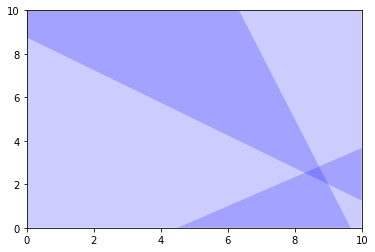

In [9]:
plt.xlim(0,10) # Limites des abscisses de la fenêtre graphique
plt.ylim(0,10) # Limites des ordonnées de la fenêtre graphique

# 3x + y < 29
x = [0, 29/3, 19/3,  0]
y = [0,    0,   10, 10]
# Usage de la fonction fill pour "remplir" le quadrilatère
# Usage du paramètre alpha pour la transparence
plt.fill(x, y,'b',alpha=0.2)

# 3y + 9 < 2x
x = [9/2,   10, 10]
y = [  0, 11/3,  0]
plt.fill(x, y,'b',alpha=0.2)

# 3x + 4y > 35
x = [   0,  10, 10,  0]
y = [35/4, 5/4, 10, 10]
plt.fill(x, y,'b',alpha=0.2)

plt.show()

**Solution :** Si le problème précédent admet une solution, alors il suffit de chercher parmi les sommets de la région.

**Remarque :** 

+ L'énoncé rigoureux du théorème d'optimisation sous-jacent dépasse le cadre de ce cours.
+ Ce théorème permet de réduire l'espace de recherche des solutions : on passe du quart de plan (infini) à une liste (finie) de sommets.

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM</p>

+ Déterminer les coordonnées des sommets de la région.
+ Déterminer le minimum et le maximum de la quantité à optimiser (coordonnées et valeur)

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Méthode sur l'étagère</p>

In [16]:
# Consulter "le mode d'emploi"
c = [-1,4]
A = [[3,1],[-2,3],[-3,-4]]
b = [29,-9,-35]
x = (0,None)
y = (0,None)

# Recherche du minimum
res = linprog(c,A,b,bounds=(x,y),method='Simplex')
print(res)

# Le maximum se situe en (96/11;31/11) et vaut 28/11

     con: array([], dtype=float64)
     fun: -1.0000000000000036
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([0., 3., 0.])
  status: 0
 success: True
       x: array([9., 2.])


<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP</p>

Trouver :

+ le minimum et le maximum (coordonnées et valeurs) de : $Z = y-5x$
+ sous les contraintes : $x+4y \geq 24$, $2y-x \leq 8$, $3x-2y \leq 10$
+ avec $x\geq 0$, $y\geq 0$

Questions :

+ Produisez une visualisation comme dans l'exemple de cours
+ Utilisez la fonction `linprog` pour valider votre solution graphique 

**Indication :** Pour le graphique, faites les calculs à la main pour déterminer les sommets des polygônes puis codez les résultats "en dur".

**Appelez l'enseignant pour qu'il valide votre graphique et votre usage de `linprog`.**

In [1]:
# Insérez votre code

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP</p>

Même exercice que le précédent, avec la situation suivante.

Trouver :

+ le minimum et le maximum (coordonnées et valeur) : $Z = 3y-2x$
+ sous les contraintes : $2y \leq x + 5$, $x+y \leq 13$, $x+4y \geq 19$
+ avec $x\geq 0$, $y\geq 0$

**Appelez l'enseignant pour qu'il valide votre graphique et votre usage de `linprog`.**

In [2]:
# Insérez votre code

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

Etudiez la méthode du simplexe, utilisez une fonction sur l'étagère qui l'implémente, codez votre propre approche, testez !

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#D67D3A">A compléter ...</p>

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Algorithme de "Descente de gradient" </p>

**Remarque :** Certains affirment que tout le "Deep Learning" se résume à faire de la descente de gradient ...

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Représentations de fonctions de deux variables</p> 

#### Tracés de surfaces

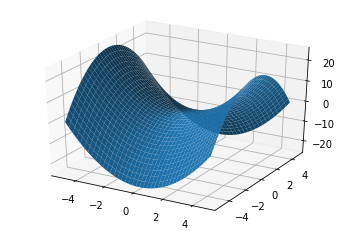

In [22]:
# Exemple 1 : le paraboloïde-hyperbolique
fig = plt.figure()
ax = fig.gca(projection='3d')

# Calcul des points de la surface
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
# Surface à représenter : 
# Un paraboloïde-hyperbolique avec son point selle.
Z = X**2 - Y**2

# Trace la surface
surf = ax.plot_surface(X, Y, Z)
plt.show()

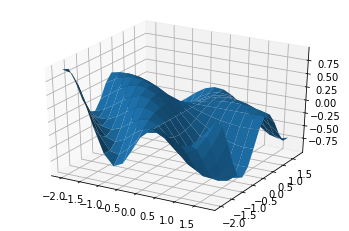

In [30]:
# Exemple 2

def f(x,y):
    return np.sin(x*(y-1/2))*np.cos(x/2+y)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Calcul des points de la surface
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Trace la surface
surf = ax.plot_surface(X, Y, Z)
plt.show()

#### Carte de température

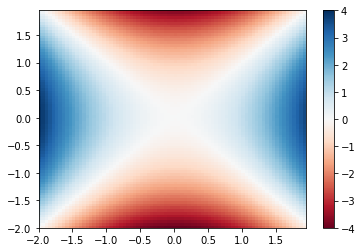

In [29]:
# Exemple 1 : le paraboloïde-hyperbolique
fig = plt.figure()
ax = fig.gca()

# Calcul des points de la surface
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 - Y**2

# Trace la carte de couleur
colormap = ax.pcolormesh(X, Y, Z, cmap='RdBu')
fig.colorbar(colormap)
plt.show()

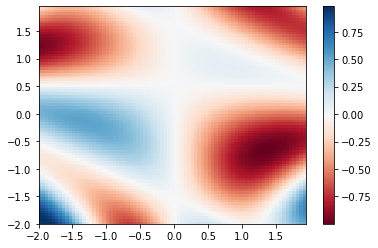

In [24]:
# Exemple 2 : 

def f(x,y):
    return np.sin(x*(y-1/2))*np.cos(x/2+y)

# Préparation de la carte des températures
fig = plt.figure()
ax = fig.gca()

# Calcul des points de la surface
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Trace la carte de couleur
colormap = ax.pcolormesh(X, Y, Z, cmap='RdBu')
fig.colorbar(colormap)
plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP</p>

On considère la fonction $f$ de deux variables $(x,y)$ définie par :
$$f(x,y) = 4 e^{-(\frac{x^2}{2}+\frac{y^2}{4})} \sin(x(y-\frac{1}{2})) \cos(\frac{x}{2}+y)$$

+ Définissez cette fonction $f$ en `Python`
+ Représentez sa surface avec $x \in \lbrack -5,5 \rbrack$ et $y \in \lbrack -5,5 \rbrack$
+ Construisez la carte des températures

**Appelez l'enseignant pour qu'il valide vos graphiques**

In [3]:
# Insérez votre code

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Gradient</p>

#### Dérivée partielle

Pour une fonction $f : (x,y) \to f(x,y)$ de deux variables réelles à valeurs réelles :

+ la dérivée partielle $\frac{\partial f}{\partial x}$ est la fonction de deux variables réelles à valeurs réelles obtenue en dérivant $f$ par rappport à $x$ (et en faisant comme si $y$ était un nombre).
+ la dérivée partielle $\frac{\partial f}{\partial y}$ est la fonction de deux variables réelles à valeurs réelles obtenue en dérivant $f$ par rappport à $y$ (et en faisant comme si $x$ était un nombre).

**Exemple :** 

+ $f(x,y) = x^3 + x^5 y^2 + y^7$
+ $\frac{\partial f}{\partial x} = 3x^2 + 5x^4 y^2$
+ $\frac{\partial f}{\partial y} = 2x^5 y + 7y^6$

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM</p>

Calculez les dérivées partielles de la fonction $f$ ci-dessous :

$$f(x,y) = \sin(x(y-\frac{1}{2}))\cos(\frac{x}{2}+y)$$

#### Définition du gradient

Pour une fonction $f$ de deux variables $(x,y)$ à valeurs réelles, le vecteur gradient, noté $\nabla f(x,y)$ 
est défini par :

$$\nabla f(x,y) = (\frac{\partial f}{\partial x},\frac{\partial f}{\partial y})$$

**Remarque :** Ce vecteur gradient a pour propriété de donner la direction de la plus grande pente, dans le sens croissant.

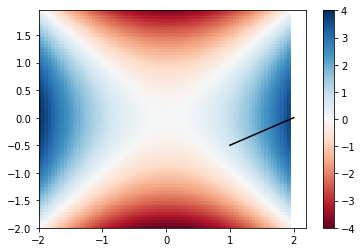

In [41]:
# Exemple 1 : le paraboloïde-hyperbolique

def f(x,y):
    return x**2 - y**2

def dfdx(x,y):
    return 2*x

def dfdy(x,y,):
    return -2*y
"""
# Exemple 2 :

def f(x,y):
    return np.sin(x*(y-1/2))*np.cos(x/2+y)

def dfdx(x,y):
    return (y-1/2)*np.cos(x*(y-1/2))*np.cos(x/2+y) - 1/2*np.sin(x*(y-1/2))*np.sin(x/2+y)

def dfdy(x,y,):
    return x*np.cos(x*(y-1/2))*np.cos(x/2+y) - np.sin(x*(y-1/2))*np.sin(x/2+y)
"""
fig = plt.figure()
ax = fig.gca()

# Calcul des points de la surface
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Trace la carte de couleur
colormap = ax.pcolormesh(X, Y, Z, cmap='RdBu')
fig.colorbar(colormap)

# Gradient
x = 1.0
y = -0.5
h = 0.5
plt.plot([x,x+h*dfdx(x,y)],[y,y+h*dfdy(x,y)], c = [0.0,0.0,0.0,1.0])
plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP</p>

+ A la main (papier-crayon), calculez les dérivées partielles $\frac{\partial f}{\partial x}$ et $\frac{\partial f}{\partial y}$ de cette fonction :
$$f(x,y) = 4 e^{-(\frac{x^2}{2}+\frac{y^2}{4})} \sin(x(y-\frac{1}{2})) \cos(\frac{x}{2}+y)$$
+ Avec les formules que vous venez de calculer, définissez, en `Python`, une fonction `gradf(x,y)` qui retourne le vecteur $\nabla f(x,y)$, gradient de la fonction $f$ au point $(x,y)$ (utilisez un `numpy.array`)
+ Reprenez la carte de température précédente et ajoutez-y quelques vecteurs gradients afin de visualiser leurs directions.

<p style="font-weight:bold; color:#D67D3A">Attention : dans ces premières fonctions, $f$ est une variable globable qui n'est pas passée en argument de la fonction.</p>

**Appelez l'enseignant pour qu'il valide votre graphique**

In [4]:
# Insérez votre code

#### Calcul numérique du gradient

**Rappel :** La dérivée d'une fonction $f$ en un point $a$ peut être calculée avec la formule :
$$ f'(a) = \lim_{h \to 0} \frac{f(a+h)-f(a-h)}{2h} $$

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM</p>

A l'aide de cette formule de taux d'accroissement, retrouvez le fait que :

$$f'(a) = 2a$$

In [43]:
def f(x,y):
    return x**2 - y**2

x = 2.0
y = 3.0
h = 0.01

dfdx = (f(x+h,y)-f(x-h,y))/(2*h)

print(dfdx)

3.9999999999999147


<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP</p>

+ Définissez, en `Python`, une nouvelle fonction `gradf_num(x,y)` qui retourne le gradient de $f$ en $(x,y)$ sans utiliser les formules calculées à la main, mais en approximant à l'aide de la limite d'un taux d'accroissement.
+ Dernière stratégie : pour une troisème fonction `gradf_scipy(x,y)`, au lieu d'approximer la dérivée par un taux d'accroissement, vous utiliserez la fonction `scipy.misc.derivative` (l'appel se fera avec un pas $h = 10^{-5}$).
+ Comparez les résultats donnés par les trois fonctions. 

<p style="font-weight:bold; color:#D67D3A">Attention, à nouveau : dans ces premières fonctions, $f$ est une variable globable qui n'est pas passée en argument de la fonction.</p>

**Déposez votre fonction `gradf_scipy(x,y)` sur Moodle avant la fin de la semaine**

In [5]:
# Insérez votre code

#### Interlude sur les fonctions en `Python`

Il est possible pour une fonction de :

+ Prendre une fonction en argument (déjà vu : `dicho`)
+ Retourner une fonction (déjà vu : `Lagrange`)
+ Combiner les deux (cf : exemple ci-dessous et exercice de TP `grad`)

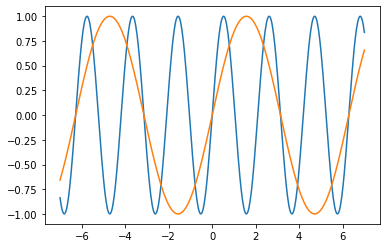

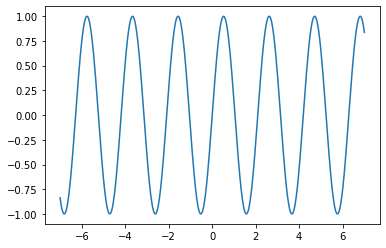

In [4]:
# Mot-clé lambda : fonction anonyme.

def compose(f,g):
    return lambda x: f(g(x))

def f(x):
    return np.sin(x)

def g(x):
    return 3*x

x = np.linspace(-7,7,500)
plt.plot(x,f(g(x)))
plt.plot(x,f(x))
plt.show()
plt.plot(x,compose(f,g)(x))
plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP : La fonction gradient</p>

Il s'agit maintenant de faire passer la fonction $f$ en paramètre et de retourner une fonction gradient vectorielle.
Ecrivez en `Python`, une fonction `grad(f)` qui prend une fonction $f$ en paramètre et qui retourne la fonction vectorielle de deux variables $(x,y)$ définie par $\nabla f(x,y)$.

Vous pourrez à nouveau utiliser `scipy.misc.derivate` et une précision de $10^{-5}$.

**Déposez votre fonction `grad(f)` sur Moodle avant la fin de la semaine**

In [6]:
# Insérez votre code

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Théorie - Synthèse</p>

+ Avec la fonction `dicho(f,a,b,e)`, vous avez codé une fonction prenant une fonction en argument et retournant un nombre.
+ Avec la fonction `Lagrange(X,Y)`, vous avez codé une fonction prenant des nombres en arguments et retournant une fonction.
+ Avec la fonction `grad(f)`, vous avez codé une fonction prenant une fonction en argument et retournant une fonction.

D'un point de vue de la nature des objets manipulés ici, on a la situation suivante :

$$f : \left\{\begin{matrix}
\mathbb{R}^2 & \to & \mathbb{R} \\
(x,y) & \mapsto & f(x)
\end{matrix}\right. \in \mathcal{F}(\mathbb{R}^2,\mathbb{R})$$

$$\nabla(f) : \left\{\begin{matrix}
\mathbb{R}^2 & \to & \mathbb{R}^2 \\
(x,y) & \mapsto & (\displaystyle\frac{\partial f}{\partial x}(x,y),\frac{\partial f}{\partial y}(x,y))
\end{matrix}\right.\in \mathcal{F}(\mathbb{R}^2,\mathbb{R}^2)$$

$$\nabla : \left\{\begin{matrix}
\mathcal{F}(\mathbb{R}^2,\mathbb{R}) & \to & \mathcal{F}(\mathbb{R}^2,\mathbb{R}^2) \\
\left(f : \begin{matrix}
\mathbb{R}^2 & \to & \mathbb{R} \\
(x,y) & \mapsto & f(x)
\end{matrix}\right)
& \mapsto &
\left(\nabla(f) : \begin{matrix}
\mathbb{R}^2 & \to & \mathbb{R}^2 \\
(x,y) & \mapsto & (\displaystyle\frac{\partial f}{\partial x}(x,y),\frac{\partial f}{\partial y}(x,y))
\end{matrix}\right)
\end{matrix}\right.$$
En programmation fonctionnelle pure, les seuls objets manipulés sont des fonctions. Cette approche fonctionnelle présente de multiples avantages, en particulier l'absence d'effets de bord et la facilité de parallèliser les calculs.
Le cours de programmation fonctionnelle en L3 présentera ce paradigme et ses applications en détails.

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP : Promenade le long du gradient</p>

Sur la carte de température précédente, vous allez construire quelques itérations (par exemple $n=10$) d'une trajectoire partant d'un point aléatoire $(x_0,y_0)$ et avançant à l'opposé du gradient d'un pas $h$ fixé :

+ Fixez un nombre d'itérations $N=10$ par exemple; vous augementerez plus tard.
+ Choisissez un pas $h$ (par exemple $h=0.1$, vous essaierez d'autres valeurs).
+ Choisissez le point initial $P_0(x_0,y_0) \in \lbrack -2,2 \rbrack \times \lbrack -2,2 \rbrack$.
+ Déterminez les coordonnées du point $P_1(x_1,y_1)$ obtenu en avancant du pas $h$ dans la direction opposée au gradient de $f$.
+ Tracez sur la carte de température le segment $\lbrack P_0 P_1 \rbrack$
+ Recommencez à partir du point $P_1$
+ Et ainsi de suite pendant $N$ itérations.

**Appelez l'enseignant pour qu'il valide votre graphique**

In [7]:
# Insérez votre code

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP : Algorithme de descente de gradient</p>

Dans la réalité, ce n'est pas l'utilisateur qui fixe le nombre d'itérations. Une condition d'arrêt est utilisée à la place.

Essayez :
+ distance entre deux itérations successives plus petite qu'un seuil que vous choisissez.
+ longueur du gradient plus petite qu'un seuil que vous choisissez.

Observez le nombre d'itérations.
Il est également possible de changer le pas au fur et à mesure ... vous pouvez faire des essais !

In [8]:
# Insérez votre code

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Théorie</p>

D'un certain point de vue, l'algorithme de descente peut être classé dans la catégorie "algorithme glouton" (greedy algorithm en anglais). 

En effet, un algorithme glouton, consiste à découper un problème en sous-problèmes et à prendre la solution optimale de chaque sous-problème, espérant ainsi obtenir la solution optimale du problème de départ.

Le gradient pointant dans la direction de la plus grande pente croissante, chaque pas dans la direction du gradient est optimal pour maximiser la fonction initiale.

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#D67D3A">Attention : </p>

+ Pour le TP04, pendant la séance, vous avez $4$ exercices à montrer : les graphiques d'optimisation linéaire, les représentations de surface et température, la représentation des gradients et le graphique de descente.
+ Pour le TP04, avant la fin de semaine, vous avez $2$ fonctions à déposer : `gradf_scipy(x,y)` et `grad(f)`.
+ Lors de l'évaluation sur feuille, il vous sera demandé de calculer "à la main", des gradients puis de faire quelques itérations de l'algorithme de descente. Il vous sera également demandé de régionner le plan et de calculer les coordonnées des sommets d'une région du plan.